In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose
from scipy import signal

# Loading and preparing the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))



In [ ]:
# Autoencoder architecture
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(x)


d = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
d = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(d)
d = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(d)

decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(d)


autoencoder = Model(input_img, decoded, name="autoencoder")

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Create encoder model (subset of the autoencoder)
encoder = Model(input_img, encoded, name="encoder")

In [ ]:
# Training the autoencoder
batch_size = 64
epochs = 5
history = autoencoder.fit(x_train, x_train, epochs=epochs, batch_size=batch_size, shuffle=True,
          validation_data=(x_test, x_test))



Epoch 1/5
938/938 [==============================] - 532s 566ms/step - loss: 0.0039 - val_loss: 2.3068e-04
Epoch 2/5
938/938 [==============================] - 1008s 1s/step - loss: 1.2271e-04 - val_loss: 5.7850e-05
Epoch 3/5
938/938 [==============================] - 511s 545ms/step - loss: 7.5172e-05 - val_loss: 3.4845e-05
Epoch 4/5
938/938 [==============================] - 532s 567ms/step - loss: 5.9186e-05 - val_loss: 9.8998e-05
Epoch 5/5
938/938 [==============================] - 549s 585ms/step - loss: 4.8893e-05 - val_loss: 1.8770e-05


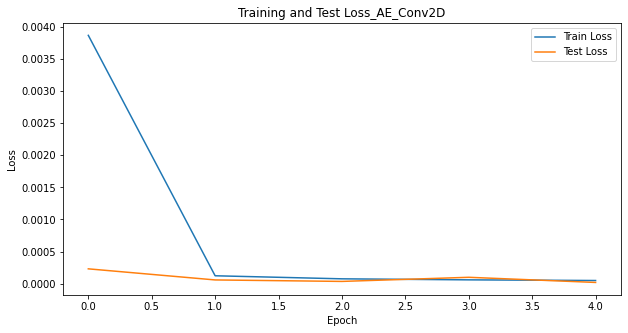

In [ ]:
# Графік функції втрат
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss_AE_Conv2D')
plt.legend()
plt.show()




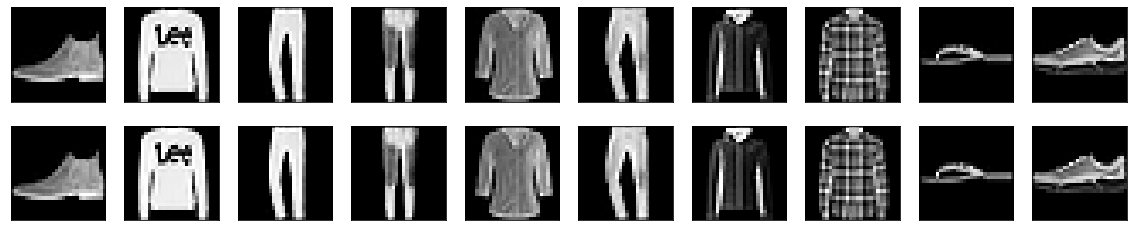

In [ ]:
n = 10

imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

plt.figure(figsize=(2*n, 2*2))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax2 = plt.subplot(2, n, i+n+1)
  plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)


In [ ]:
def plot_digits(*images):
    images = [x.squeeze() for x in images]
    n = min([x.shape[0] for x in images])

    plt.figure(figsize=(2*n, 2*len(images)))
    for j in range(n):
        for i in range(len(images)):
            ax = plt.subplot(len(images), n, i*n + j + 1)
            plt.imshow(images[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

def plot_homotopy(frm, to, n=10, autoencoder=None):
    z = np.zeros(([n] + list(frm.shape)))
    for i, t in enumerate(np.linspace(0., 1., n)):
        z[i] = frm * (1-t) + to * t  # Гомотопия по прямой
    if autoencoder:
        plot_digits(autoencoder.predict(z, batch_size=n))
    else:
        plot_digits(z)

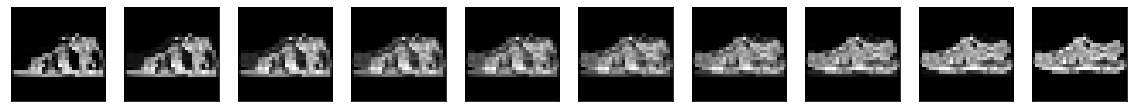

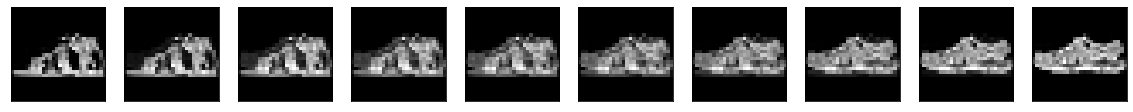

In [ ]:
frm, to = x_test[y_test == 5][1:3]
plot_homotopy(frm, to)
plot_homotopy(frm, to, autoencoder=autoencoder)

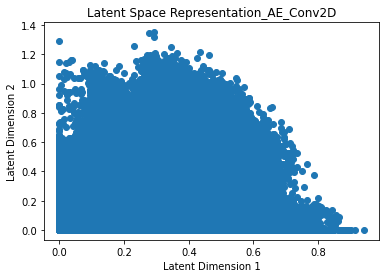

In [ ]:
# Побудова графіка розподілу представлень
h = encoder.predict(x_test)
plt.scatter(h[:, 0], h[:, 1])
plt.title('Latent Space Representation_AE_Сonv2D')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()